**Course**: Data Visualization (Prof. Dr. Heike Leitte, Jan-Tobias Sohns, TU Kaiserslautern),   **Name**: XXX XXX,   **Date**: XX.XX.2020

<div class="alert alert-info">

# Assignment 5 - Graphs
</div>



### Outline and goals

In the fifth assignment, we will revise graph drawing and graph analysis using three types of graphs. You will learn about the [networkx library](https://networkx.github.io) and the [pygraphviz library](https://pygraphviz.github.io) for graph analysis and drawing. The goals of the assignment are:
- be able to decide on an appropriate layout for a given graph and discuss aesthetics criteria
- draw a graph in the notebook and manipulate the visualization
- analyze a given graph algorithmicly and visually

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

In [1]:
import pandas as pd
import numpy as np
import math

import networkx as nx # there have been problems with networkx and pygraphviz on windows in the past. If possible, try a different system.
import pydot
from networkx.drawing.nx_pydot import to_pydot
import itertools
from bokeh.palettes import Category20

from IPython.display import Image, display

<div class="alert alert-info">

## Exercise 1 - Graph algorithms recap
</div>

In the first exercise, you will work on a synthetic graph to practice fundamental operations and revise the concepts from the lecture.


**1.1 Manual drawing**

G1 below is defined as a directed graph [nx.DiGraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html). Edges are given as ordered tuples `(start_node, end_node)`.  

<div class="alert alert-success">
    
- Draw the graph defined in G1 manually (no prove required). Do not follow the rules learned in class, but create a layout to your liking.
- Did you follow aesthetics criteria? If yes, which? Either case, which ones should be followed.
- Which type of graph is G1?
- Which types of layouts are applicable?
</div>

PyGraphviz is notoriously difficult on Windows. Hence, we'll use `pydot + graphviz` instead (easier to install than `PyGraphviz`)

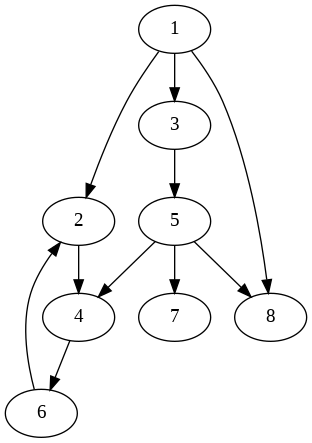

In [2]:
G1 = nx.DiGraph()
G1.add_edges_from([(1,2), (1,3), (2,4), (3,5), (5,4), (4,6), (6,2), (5,7), (5,8), (1,8)])

# Convert to pydot and render as PNG
pydot_graph = to_pydot(G1)
pydot_graph.write_png("graph.png")
Image(filename="graph.png")

**1.2 Graph drawing**
    
The [pygraphviz library](https://pygraphviz.github.io) is used to obtain the layout. Pygraphviz is partly integrated into networkx and uses the [AGraph](http://pygraphviz.github.io/documentation/pygraphviz-1.5/reference/agraph.html) graph representation. The result image of the graph drawing routine can be exported or rendered in the notebook using the [`Image`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image) class to encapsulate it.

Using the graph drawing above, answer the following questions:

<div class="alert alert-success">
    
- Which layout algorithm is used to render G1?
- Does the graph G1 contain cycles? If yes, which?
- Why is node 2 rendered on level 3?
- Compute the forward, backward and cross edges of G1. Children are handeled in order of their id, smallest first. The method `classify_edges` below implements the edge classification for recap.
</div>

In [3]:
def classify_edges(G):
    '''Edge classification of a directed graph using depth first search.
    '''
    # nodes that have been visited in the traversal
    marked = dict([(n,0) for n in sorted(G.nodes)])

    # do depth-first-traversal and classify edges
    # traverse edges with (start, end, edge type d)
    for s,e,d in nx.dfs_labeled_edges(G):
        if (s==e):
            continue

        # mark start-node as visited
        marked[s] = 1

        # skip return-to-child-node step in DFS
        if  (d == 'reverse'):
            continue

        # if end-node has not been visited yet, its a tree edge
        if marked[e] == 0:
            print(s,e,'tree edge')
            marked[e] = 1
        # end-node has been visited before
        else:
            # create graph without current edge
            G_ = G.copy()
            G_.remove_edge(s,e)
            if e in nx.descendants(G_, s):
                print(s,e,'forward edge')
            elif e in nx.ancestors(G_, s):
                print(s,e,'backward edge')
            else:
                print(s,e,'cross edge')

classify_edges(G1)

1 2 tree edge
2 4 tree edge
4 6 tree edge
6 2 backward edge
1 3 tree edge
3 5 tree edge
5 4 cross edge
5 7 tree edge
5 8 tree edge
1 8 forward edge


<div class="alert alert-info">

## Exercise 2 - Working with hierarchies
</div>

The file [`programmingLanguages.gml`](programmingLanguages.gml) contains information on the genealogy of some of the more influential or widely used programming languages as discussed by (Scott, 2000). Edges indicate principal influences on design. The resulting graph encodes the flow of ideas through the languages and their paradigms. Many influences, of course, cannot be shown in a single figure, but the chart can give a good initial sense of dependencies.

Note that the graph also contains a date for each language which indicates the approximate time at which its features became widely known. This information can be used for rendering but is not incorporated in the current layout.

In [4]:
G2 = nx.read_gml("programmingLanguages.gml")

print("nodes in the graph", G2.nodes(data=True))
print()

language = 'Simula'
print(language, "became widely known in", G2.nodes[language]['year'])

nodes in the graph [('Fortran I', {'year': 1957}), ('Fortran II', {'year': 1958}), ('Fortran IV', {'year': 1965}), ('Fortran 77', {'year': 1978}), ('Fortran 90', {'year': 1991}), ('Algol 58', {'year': 1958}), ('Basic', {'year': 1964}), ('Visual Basic', {'year': 1991}), ('Fortran 95', {'year': 1997}), ('Algol 60', {'year': 1960}), ('Algol W', {'year': 1966}), ('Pascal', {'year': 1971}), ('Modula-2', {'year': 1978}), ('Oberon', {'year': 1988}), ('Modula-3', {'year': 1991}), ('Algol 68', {'year': 1968}), ('BCPL', {'year': 1966}), ('C', {'year': 1972}), ('Simula', {'year': 1965}), ('Simula 67', {'year': 1967}), ('Ada', {'year': 1980}), ('Ada 95', {'year': 1995}), ('C++', {'year': 1983}), ('Smalltalk 80', {'year': 1980}), ('Eiffel', {'year': 1986}), ('Java', {'year': 1995}), ('Lisp', {'year': 1959}), ('Scheme', {'year': 1975}), ('Common Lisp', {'year': 1984}), ('CLOS', {'year': 1988}), ('ML', {'year': 1973}), ('Miranda', {'year': 1986}), ('Haskell', {'year': 1990})]

Simula became widely kn

The chart below displays the programming languages graph. Answer the following questions and give a graphical answer by coloring respective nodes.
    
<div class="alert alert-success">   
    
- **Initial languages**: Which languages were not influenced by others?
- **Long history**: Which language has the longest history, i.e., the longest path to a source node?
    - What is the path length?
    - Is the answer unique?
- **Not influenced by Fortran I**: List all languages that were not influenced by Fortran I (directly or indirectly).
</div>

**Example below**: All languages that influenced Java directly or indirectly.
    
**Hints**:
- Networkx provides [methods for directed graphs](https://networkx.github.io/documentation/stable/reference/classes/digraph.html) (see Method section at bottom of page) and
- additional [algorithms for directed acyclic graphs](https://networkx.github.io/documentation/stable/reference/algorithms/dag.html).
- Each question can be answered with one line of code.

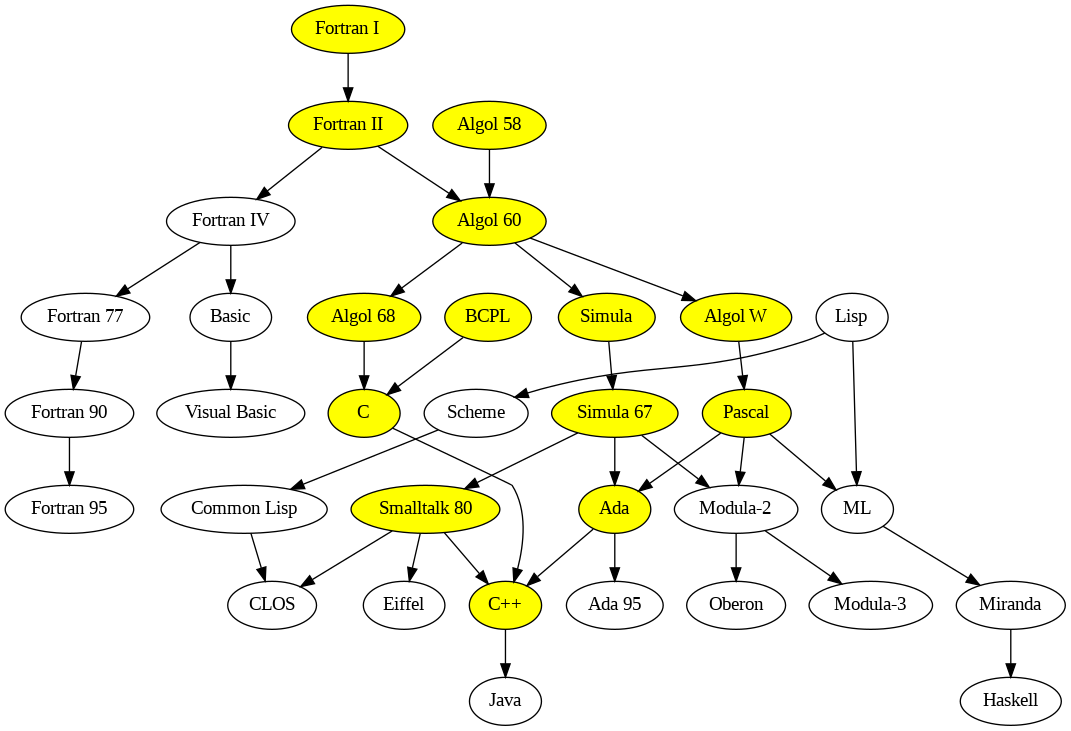

In [5]:
# Convert to pydot graph
pydot_graph = to_pydot(G2)

# Set default node style
for node in pydot_graph.get_nodes():
    node.set_style("filled")
    node.set_fillcolor("white")

# Compute influences (ancestors of 'Java')
influences = nx.algorithms.dag.ancestors(G2, "Java")

# Color influenced nodes
for node in pydot_graph.get_nodes():
    name = node.get_name().strip('"')
    if name in influences:
        node.set_fillcolor("yellow")

# Render to PNG using Graphviz
pydot_graph.write_png("G2_graph.png")
Image(filename="G2_graph.png")

<div class="alert alert-info">

## Exercise 3 - Analyzing social networks
</div>

In the last exercise, you will analyze social networks. Choose ***ONE*** of two datasets each representing a co-appearance network:
- characters in the novel Les Miserables by Victor Hugo and how often they are together on stage (edges)
- characters in fan fiction in the Harry Potter universe and a count on how often they occur together in fan fictions (edges)

A critical element in the analysis are communities. A community in a graph is a set of nodes that is densely connected, i.e., many of the nodes in a community feature pairwise edges.

The graphs below represent the respective co-occurences. Both graphs are drawn using the [`neato`](https://www.graphviz.org/pdf/neatoguide.pdf) algorithm of pygraphviz which uses a force-directed layout. Communitites are detected using the
[Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html) from networkx. Each community is colored in a unique color in the graph.
    
For your chosen social network, answer the following questions:
<div class="alert alert-success">
    
- What are aesthetics criteria aimed for by force-directed layout?
- How good are these criteria met in the graph visualization? Rate each criterion using good, medium, poor and find an area in the graph to support your rating.
- Below you can find a list of social groups present in the novel. Check if they are detected by the automatic community detection. When do the communities based on human knowledge and graph analysis match and when not?
- Can you detect characters that should belong to multiple communities?
    - by exploring the graph structure and maybe from your background knowledge
    - Advanced question: How could you visualize the affiliation with two or more communities?
</div>

### Les Miserables

The dataset [`lesmiserables.gml`](lesmiserables.gml) contains a coappearance network of characters in the novel [Les Miserables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables) by Victor Hugo. The [graph](lesmiserables_graph.png) is rendered using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data courtesy: D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*

Using 5 communities at level k=3 (bounded).


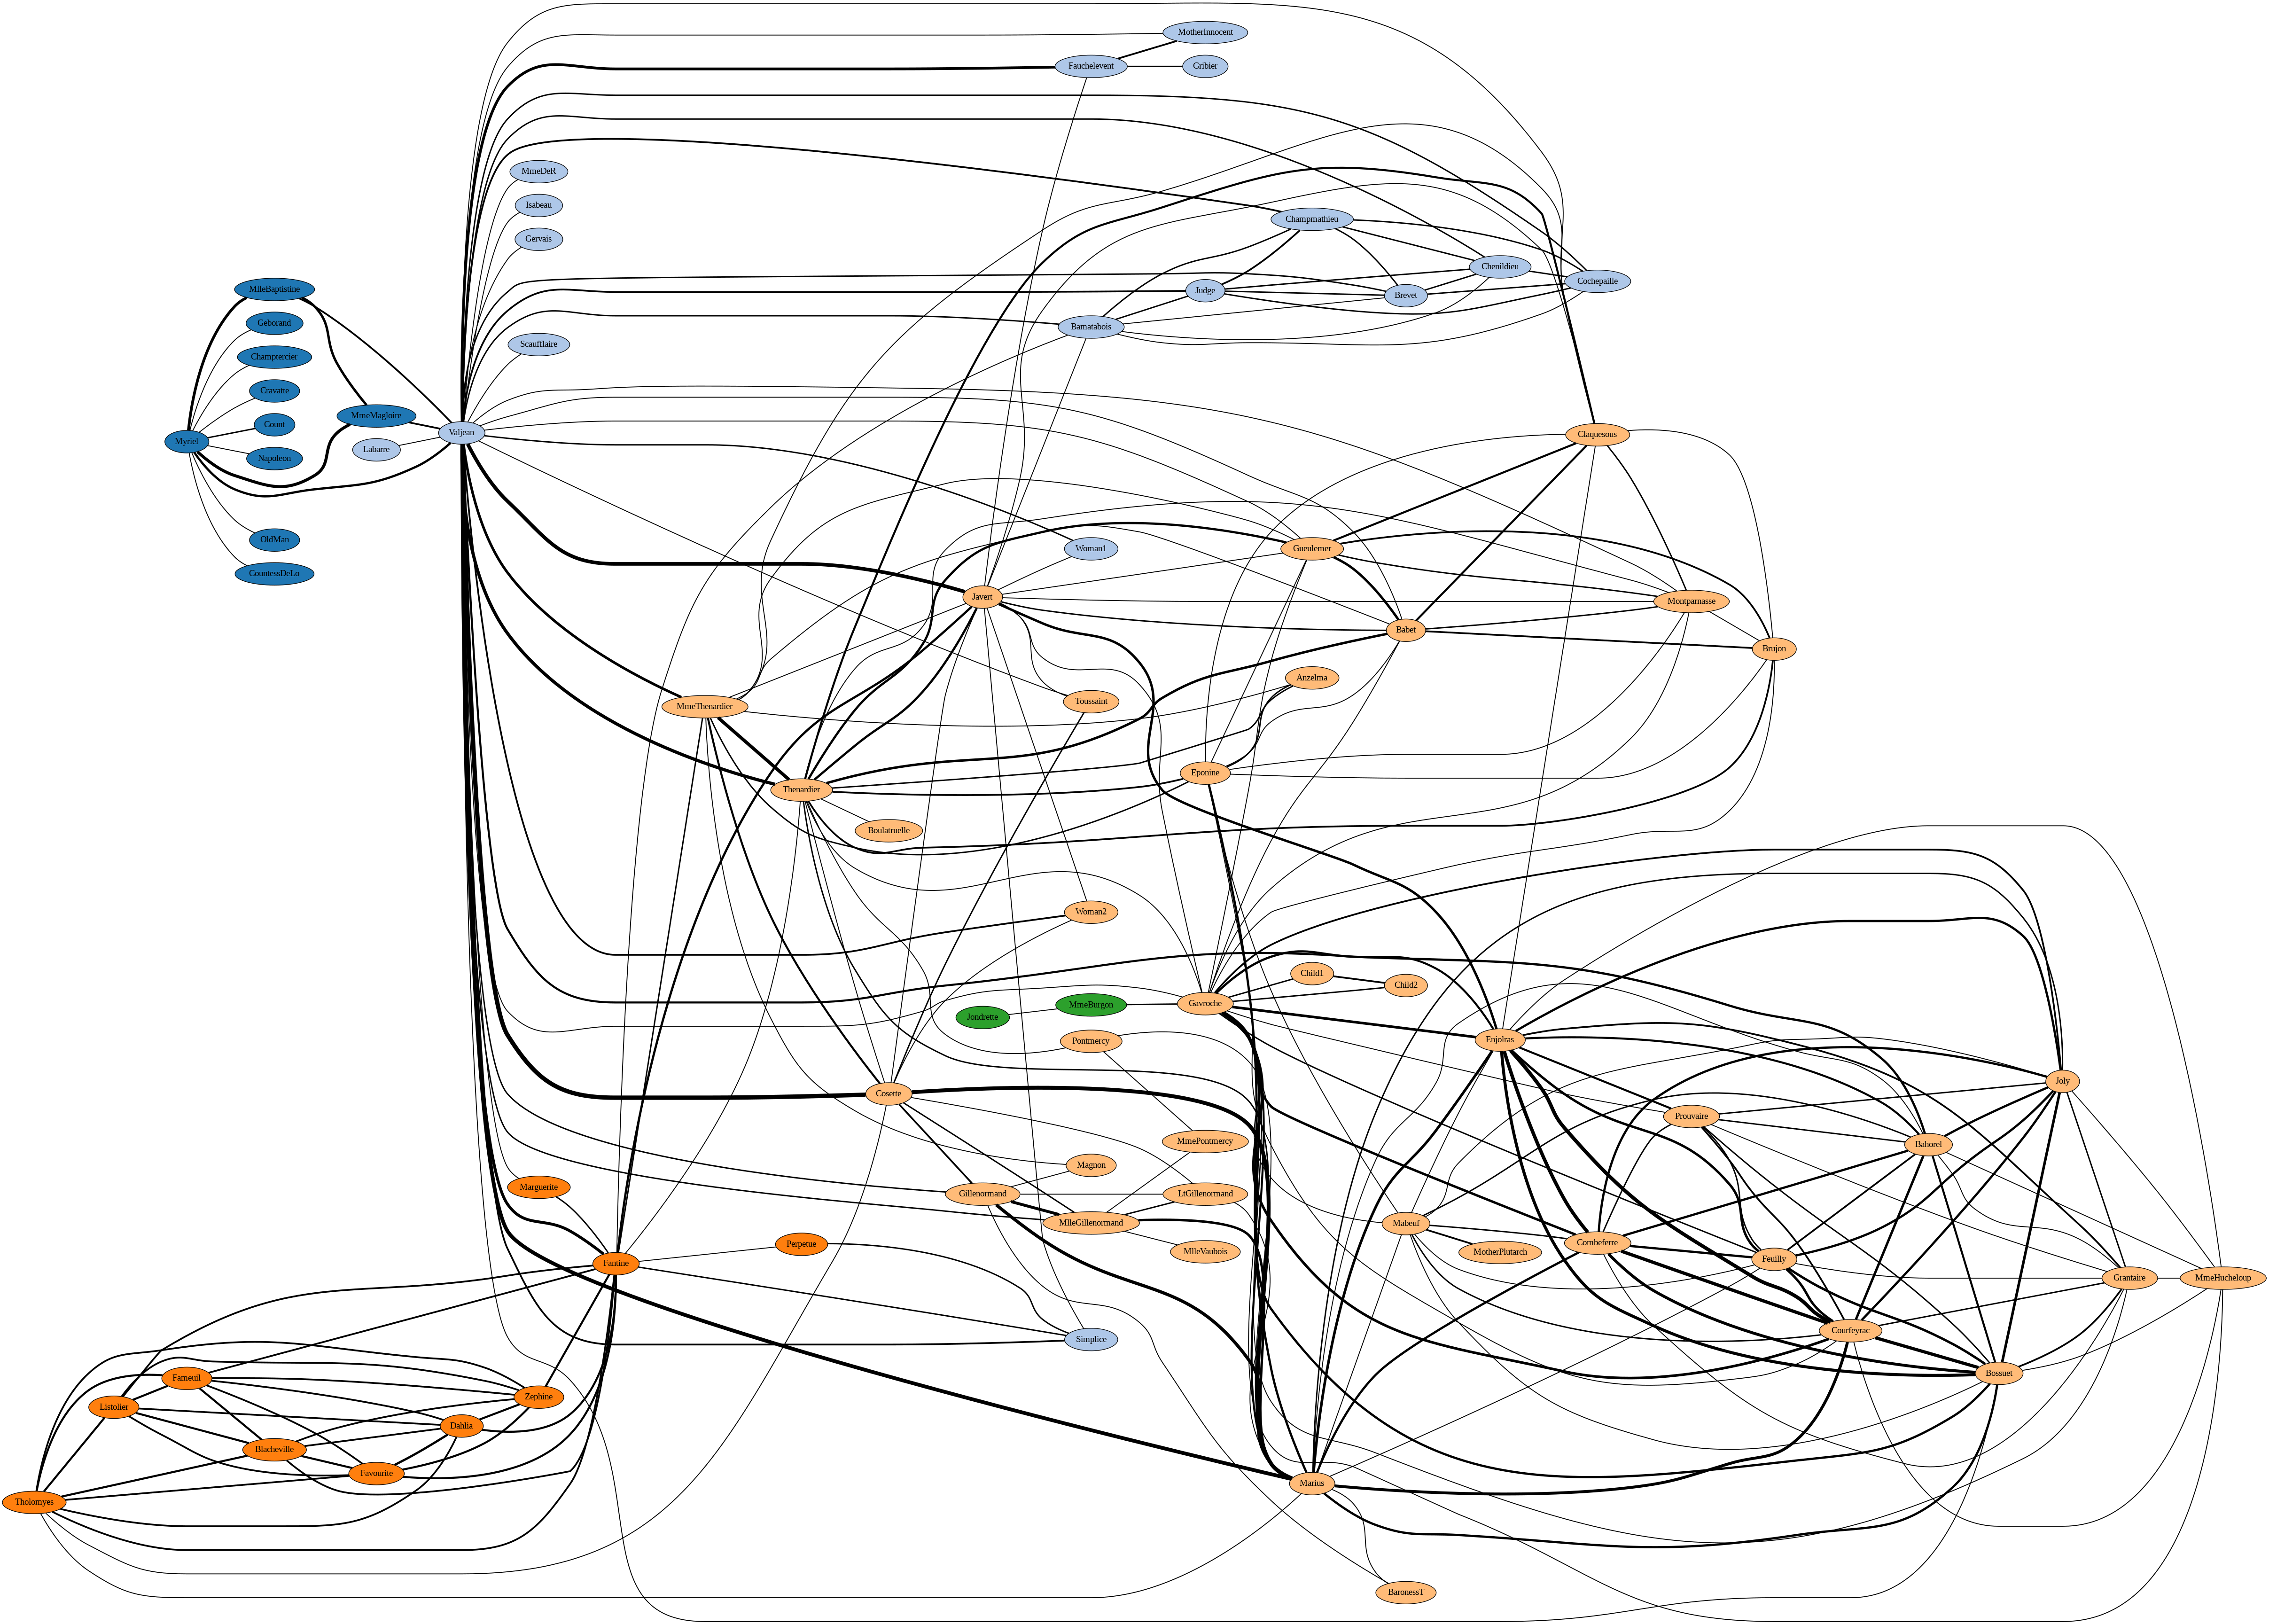

In [6]:
# ---- Load graph ----
G3 = nx.read_gml("lesmiserables.gml")

# ---- Community detection (Girvan-Newman) ----
def get_girvan_newman_communities(G, level=3):
    """
    Return a tuple-of-sets community partition at given 'level'.
    level = 0 -> original graph as single community split once? (generator semantics)
    We guard the level to be sensible (can't request many splits).
    """
    comp_gen = nx.algorithms.community.centrality.girvan_newman(G)
    # Bound the level: max splits = number of nodes-1 (practically, choose smaller)
    max_level = min(10, G.number_of_nodes() - 1)  # avoid deep iteration
    level = max(0, min(level, max_level))
    try:
        comm = next(itertools.islice(comp_gen, level, None))
    except StopIteration:
        # fallback: last available partition
        # gather all produced partitions and take last one
        comp_list = list(nx.algorithms.community.centrality.girvan_newman(G))
        if comp_list:
            comm = comp_list[-1]
        else:
            comm = (set(G.nodes()),)
    return tuple(map(set, comm))

# choose k (adjust as you like)
k = 3
communities = get_girvan_newman_communities(G3, level=k)
print(f"Using {len(communities)} communities at level k={k} (bounded).")

# ---- Prepare color palette (Category20 has 20 colors) ----
palette = Category20[20] if len(Category20[20]) >= len(communities) else None
if palette is None:
    # fallback to cycling a smaller palette
    from itertools import cycle
    color_cycle = cycle(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
else:
    from itertools import cycle
    color_cycle = cycle(palette)

# map node -> color according to community
node_color_map = {}
for color, comm in zip(color_cycle, communities):
    for n in comm:
        node_color_map[str(n)] = color  # ensure string keys for pydot

# ---- Build pydot graph from networkx G3 ----
p_graph = pydot.Dot(graph_type='graph', rankdir='LR')  # or graph_type='digraph' if directional

# Add nodes with style filled and community color
for n in G3.nodes():
    n_name = str(n)
    node = pydot.Node(n_name,
                      style="filled",
                      fillcolor=node_color_map.get(n_name, "white"),
                      shape="ellipse")
    p_graph.add_node(node)

# Add edges; scale penwidth by weight (or 'value') if present
def compute_penwidth(raw_value):
    """Scale raw_value to a reasonable penwidth. raw_value may be str or numeric."""
    try:
        w = float(raw_value)
    except Exception:
        # fallback if no numeric weight
        w = 1.0
    # nonlinear scaling to keep widths readable
    pw = max(1.0, math.log1p(w) * 2.0)
    return round(pw, 2)

for u, v, data in G3.edges(data=True):
    # try common weight keys
    raw_weight = None
    for k in ("weight", "value", "width"):
        if k in data:
            raw_weight = data[k]
            break
    penwidth = compute_penwidth(raw_weight)
    edge = pydot.Edge(str(u), str(v), penwidth=str(penwidth))
    p_graph.add_edge(edge)

# ---- Render to PNG and display ----
out_png = "lesmiserables_graph.png"
p_graph.write_png(out_png)
display(Image(filename=out_png))

A [list of characters](https://en.wikipedia.org/wiki/List_of_Les_Misérables_characters) can be found on wikipedia.

Communitites in Les Miserables in order of appearance:
- **Main characters**: Valjean, Cosette, Marius
- **People in church**: Myriel, MlleBaptistine, MmeMagloire
- **Grisettes (working women)**: Fantine, Zephine, Dahlia, Favourite
- **Wealthy students**: Blacheville, Tholomyes, Listolier, Fameuil
- **Bandits + (family)**: MmeThenardier, Thenardier, (Cosette), (Gavroche), Eponine, Anzelma, Montparnasse, Claquesous, Babet, Gueulemer, Brujon
- **Police and court**: Javert, Bamatabois, Champmathieu
- **Rich monarchists**: Gillenormand, MlleGillenormand, MmePontmercy, LtGillenormand
- **Revolutionary student club**: Marius, Enjolras, Combeferre, Prouvaire, Feuilly, Courfeyrac, Bahorel, Bossuet, Joly, Grantaire
- **Brothers**: Gavroche, Child1, Child2

### Harrry Potter fan fiction

The Harry Potter fan fiction dataset contains a co-appearance network of characters in the Harry Potter fan fiction universe. The [graph is rendered](harrypotter_graph.png) using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data source: https://gist.github.com/allisonking/c9f6ea277e4194cf7e13f49efb83b5b5*

**Preprocessing**:

Load the Harry Potter fan fiction co-occurence data and turn this into a list of co-occurences.

In [7]:
harry_potter = pd.read_csv('HarryPotter_cooccurrence.txt')

# get the upper triangular matrix and turn into a list
harry_potter = harry_potter.where(np.triu(np.ones(harry_potter.shape), k=1).astype(np.bool)).stack().reset_index()
# rename the columns
harry_potter.columns = ['A','B','cnt']
# filter character pairs that co-occur at least 300 times
harry_potter = harry_potter[harry_potter.cnt >= 300].reset_index(drop=True)

Create a graph from the input data.

Using 6 communities (k=3).


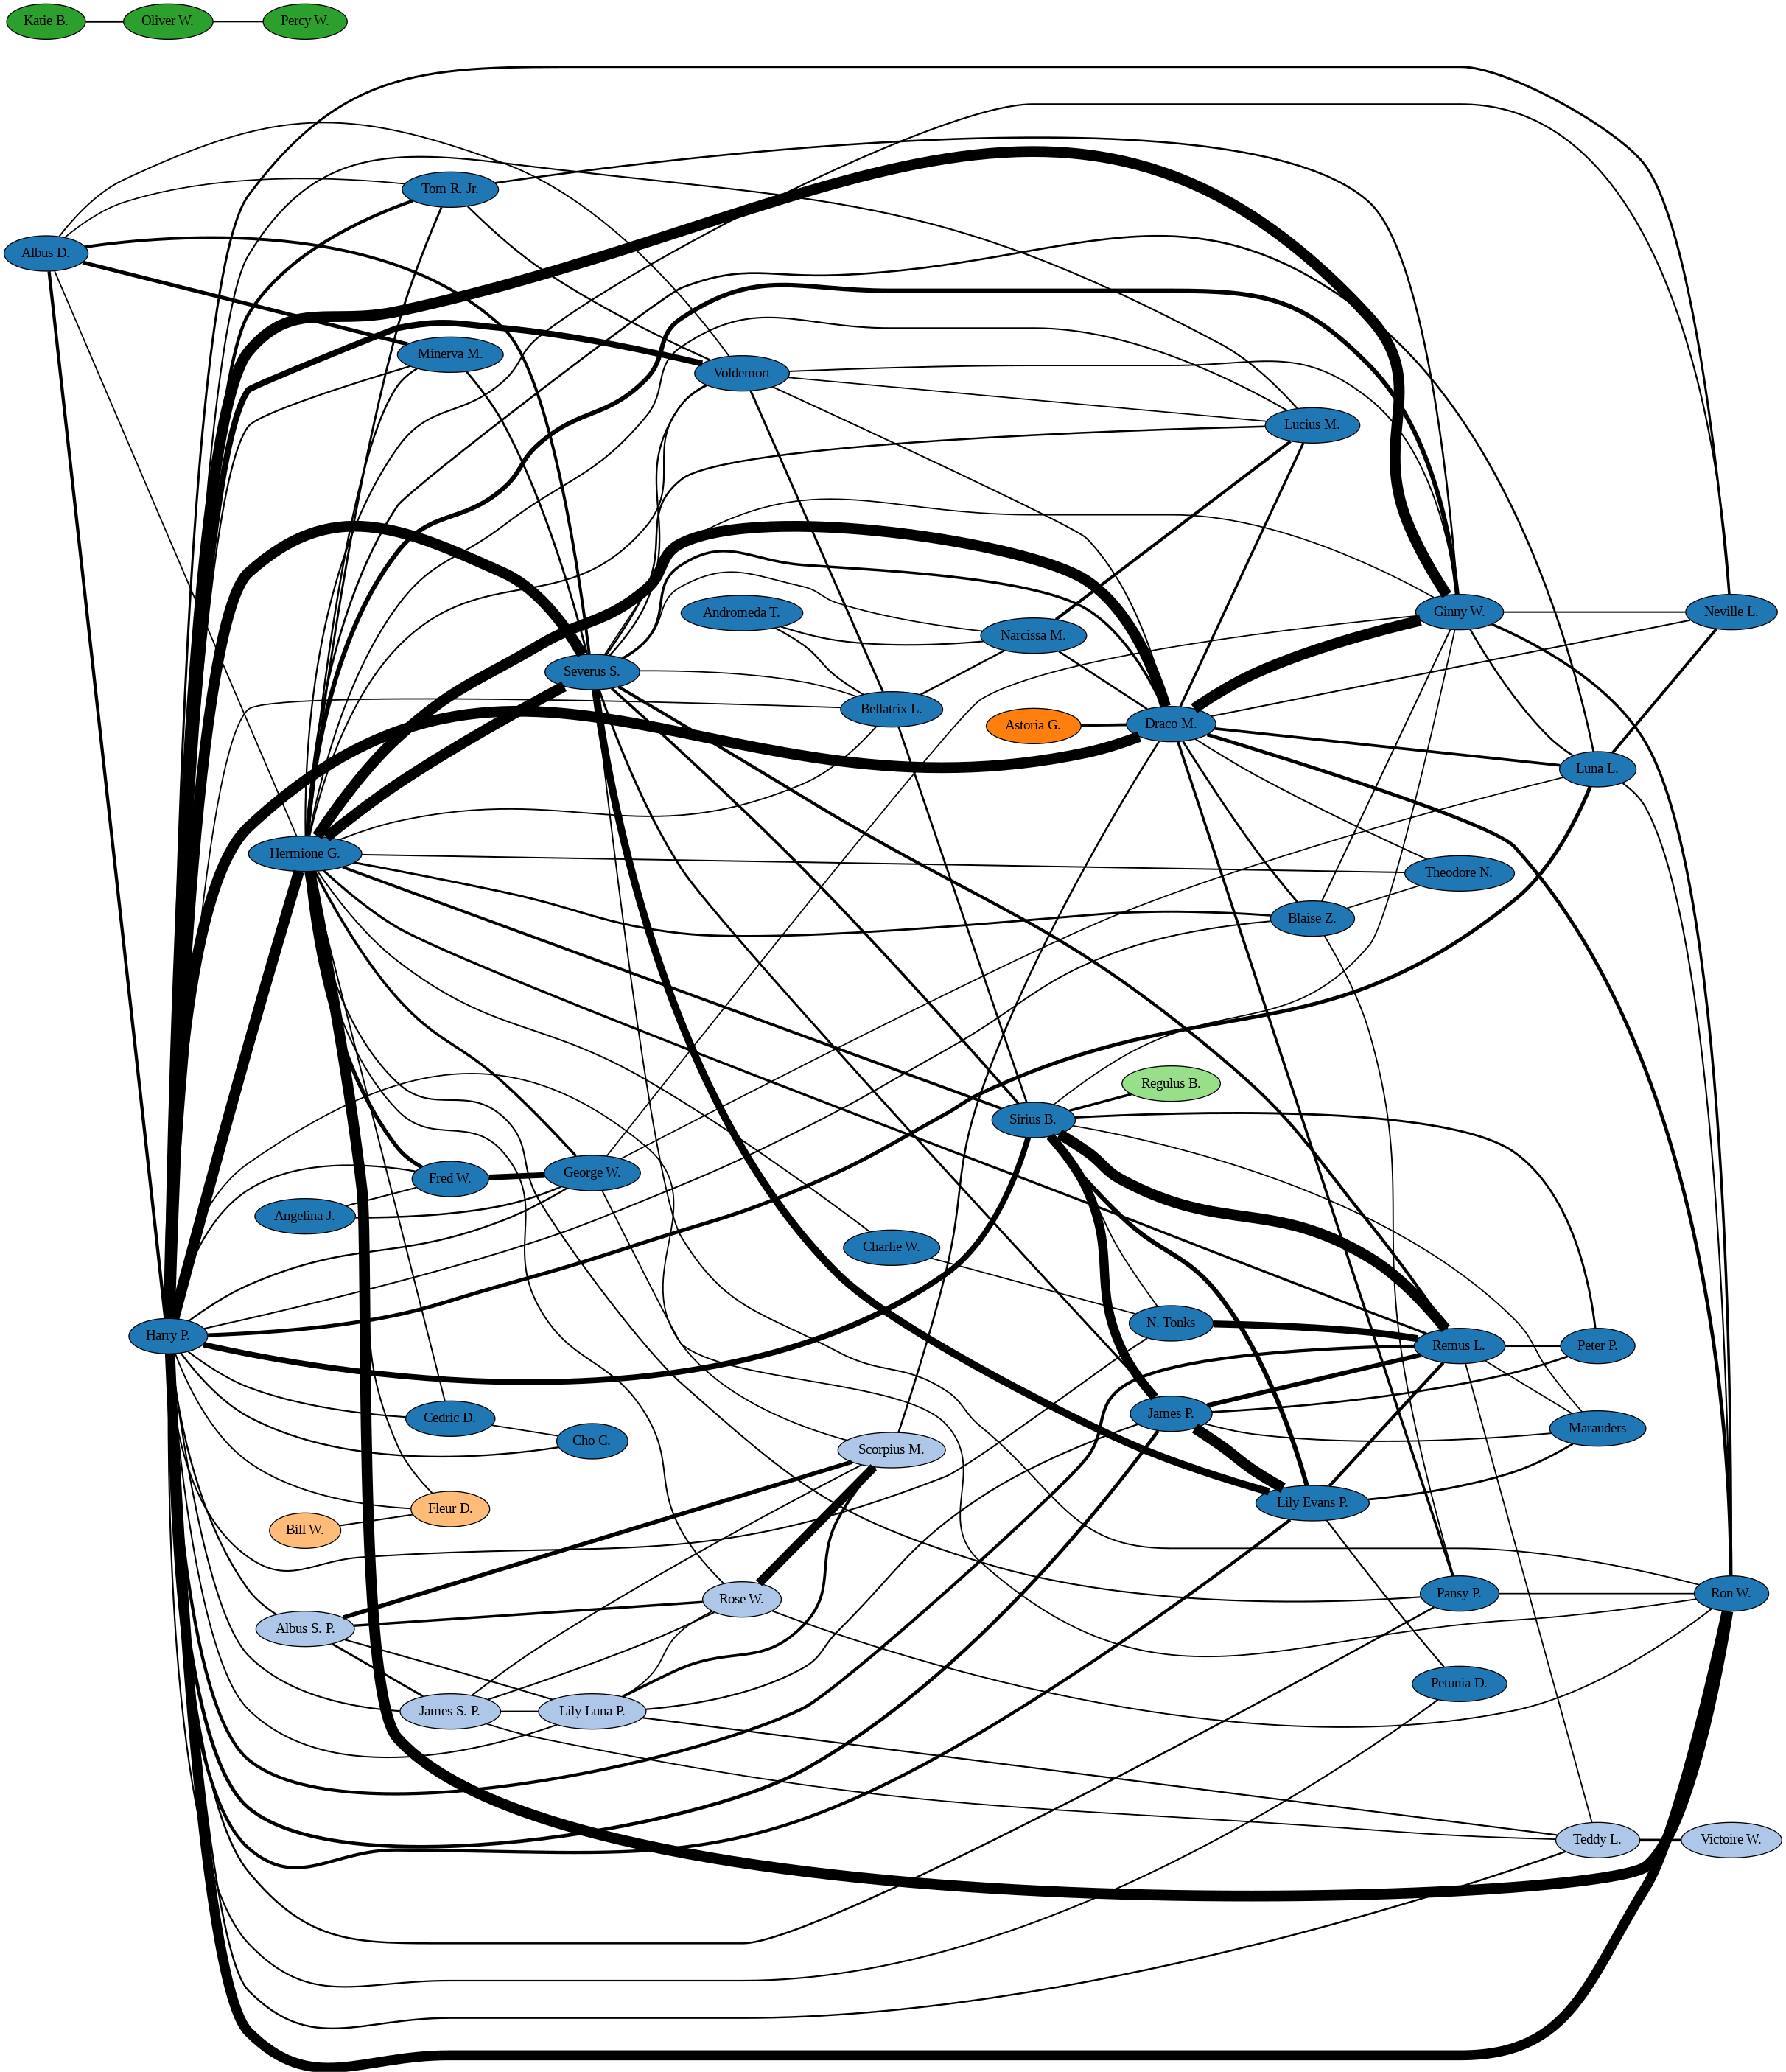

In [8]:
# 0) Build graph G4 from DataFrame 'harry_potter'
# Expect harry_potter has columns A, B, cnt (or adapt names)
G4 = nx.Graph()
# safer: iterate rows explicitly (apply returning None is odd)
for _, row in harry_potter.iterrows():
    a = row['A']
    b = row['B']
    w = row.get('cnt', row.get('weight', 1))
    try:
        w = float(w)
    except Exception:
        w = 1.0
    G4.add_edge(str(a), str(b), weight=w)

# remove 'OC' node if present
if 'OC' in G4:
    G4.remove_node('OC')

# 1) Community detection via Girvan-Newman with bounded level
def get_girvan_newman_partition(G, level=3, max_level=8):
    """
    Return a tuple of communities at requested 'level' (bounded).
    The generator yields successive splits; we take the partition at 'level'.
    """
    comp_gen = nx.algorithms.community.centrality.girvan_newman(G)
    # bound level to avoid long iteration/explosion
    level = max(0, min(level, max_level, G.number_of_nodes()-1))
    try:
        partition = next(itertools.islice(comp_gen, level, None))
    except StopIteration:
        # fallback: create one community (all nodes)
        partition = (set(G.nodes()),)
    return tuple(map(set, partition))

k = 3   # choose a modest k; change as needed (11 may be slow)
communities = get_girvan_newman_partition(G4, level=k, max_level=10)
print(f"Using {len(communities)} communities (k={k}).")

# 2) Prepare color palette, cycle if more communities than palette length
palette = Category20[20]  # 20 colors
color_cycle = cycle(palette)

# map node -> color
node_color_map = {}
for color, comm in zip(color_cycle, communities):
    for n in comm:
        node_color_map[str(n)] = color

# 3) Build pydot graph and set node styles
p_graph = pydot.Dot(graph_type='graph', rankdir='LR')  # undirected; use 'digraph' for directed

# Add nodes with fillcolor according to community (default white)
for n in G4.nodes():
    n_name = str(n)
    fill = node_color_map.get(n_name, "white")
    node = pydot.Node(n_name, style="filled", fillcolor=fill, shape="ellipse")
    p_graph.add_node(node)

# 4) Add edges with scaled penwidth based on edge weight
def compute_penwidth_from_weight(raw_weight):
    # replicate approximate original formula but robust:
    try:
        w = float(raw_weight)
    except Exception:
        w = 1.0
    # original: min(10000, float(w))/1000 + 1  -> keep but clip sensibly
    clipped = min(10000.0, max(0.0, w))
    pen = clipped / 1000.0 + 1.0
    # ensure not too thin/large and round
    pen = max(0.5, min(pen, 20.0))
    return round(pen, 2)

for u, v, data in G4.edges(data=True):
    w = data.get('weight', data.get('cnt', 1.0))
    penw = compute_penwidth_from_weight(w)
    edge = pydot.Edge(str(u), str(v), penwidth=str(penw))
    p_graph.add_edge(edge)

# 5) Render to PNG and show
out_png = "G4_lesmiserables_like_graph.png"
p_graph.write_png(out_png)
display(Image(filename=out_png))

Communitites in the Harry Potter universe:
- **Students**: Harry P., Ron W., Hermione G., Ginny W., Draco M., Neville L., Luna L., Pansy P., Blaise Z., Cedric D., Cho C.
- **Senior students**: Katie B., Oliver W., Percy W., George W., Fred W.
- **Teachers**: Albus D., Severus S., Minerva M.
- **Death Eaters**: Voldemort, Tom R. Jr., Lucius M., Narcissa M., Bellatrix L.
- **Marauders**: Marauders, James P., Sirius B., Remus L., Peter P.
- **Next generation kids**: Lily Luna P., James S. P., Albus S. P., Rose L., Teddy L., Scorpius M., Victoire W.

Additional communities
- the various families: Potter, Weasly, Malfoy, Black, Tonks, Lestrange, ...
- Order of the Phoenix
- school houses and school teams

### Estimate good number of communities in graph

First do the community detection for the parameters (0,k):

In [9]:
def performance(G, communities):
    """
    Compute the performance of a partition (as in old NetworkX <2.8).
    Performance = (edges within communities + non-edges between communities) / total possible pairs
    """
    # Flatten community structure into membership dict
    node_to_comm = {node: i for i, comm in enumerate(communities) for node in comm}
    nodes = list(G.nodes())
    n = len(nodes)
    if n < 2:
        return 0.0

    correct = 0
    total = 0
    for u, v in itertools.combinations(nodes, 2):
        same_comm = node_to_comm[u] == node_to_comm[v]
        connected = G.has_edge(u, v)
        # Correct if edge is within community or non-edge between communities
        if (connected and same_comm) or (not connected and not same_comm):
            correct += 1
        total += 1
    return correct / total

# --- use same logic as your code ---
k = 30
G = G4

comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
ks = []
qs = []

for i, communities in enumerate(limited):
    ks.append(i)
    qs.append(performance(G, communities))

print("k values:", ks)
print("performance scores:", qs)

k values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
performance scores: [0.4782608695652174, 0.5393154486586494, 0.5689176688251619, 0.5975948196114709, 0.6493987049028677, 0.6956521739130435, 0.7178538390379279, 0.8177613320999075, 0.8334875115633672, 0.8482886216466234, 0.8603145235892692, 0.8714153561517114, 0.879740980573543, 0.883441258094357, 0.8908418131359852, 0.8973172987974098, 0.9010175763182239, 0.9056429232192414, 0.9074930619796485, 0.9084181313598519, 0.910268270120259, 0.9111933395004626, 0.910268270120259, 0.910268270120259, 0.9084181313598519, 0.9074930619796485, 0.9047178538390379, 0.9010175763182239]


Alternatively,

In [10]:
from networkx.algorithms.community.quality import modularity

k = 30
G = G4

comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
kss = []
qss = []

for i, communities in enumerate(limited):
    kss.append(i)
    qss.append(modularity(G, communities))

print("k values:", kss)
print("modularity scores:", qss)

k values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
modularity scores: [0.09904432714584917, 0.10134279584446072, 0.10106732455088317, 0.10082094013668635, 0.10216833444023339, 0.10221026370314765, 0.10196918108122918, 0.343204239902667, 0.34231640510206574, 0.34129150831842475, 0.3403886458572957, 0.33506463037622614, 0.3328019431391891, 0.32895051422401106, 0.3246595994011901, 0.3268861856027601, 0.32716078400768295, 0.32347060149928036, 0.32336170359157207, 0.32068244034337684, 0.3183022867378639, 0.3162828392963858, 0.3215208791170438, 0.3190609826310056, 0.31465436791042395, 0.3085695550328737, 0.3055806567756551, 0.3011086475889324]


<div class="alert alert-success">
    
Plot these values and look for the "knee" or "elbow" in the function, i.e., the value where the curve "bends" and additional communities have little quality increase.
    
</div>

In [11]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(width=400, height=400, title="Quality of GN-Community Measure in Harry Potter Using Performance Score")

# add a line renderer
p.line(ks, qs, line_width=2)
p.xaxis.axis_label = 'Girvan Newman splitting parameter'
p.yaxis.axis_label = 'quality'

show(p)

In [12]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(width=400, height=400, title="Quality of GN-Community Measure in Harry Potter Using Modularity Score")

# add a line renderer
p.line(kss, qss, line_width=2)
p.xaxis.axis_label = 'Girvan Newman splitting parameter'
p.yaxis.axis_label = 'quality'

show(p)